In [134]:
# importing relevent libraries
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
# importing data
comcast=pd.read_csv('Comcast_telecom_complaints_data.csv')
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [136]:
# trend chart for the number of complaints on monthly and daily granularity levels.
comcast['day']=pd.to_datetime(comcast['Date_month_year']).dt.day
comcast['month']=pd.to_datetime(comcast['Date_month_year']).dt.month_name()
comcast.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,day,month
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,April
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,August
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,April


<AxesSubplot:title={'center':'Complaints on monthly level'}, xlabel='month', ylabel='Total complaints'>

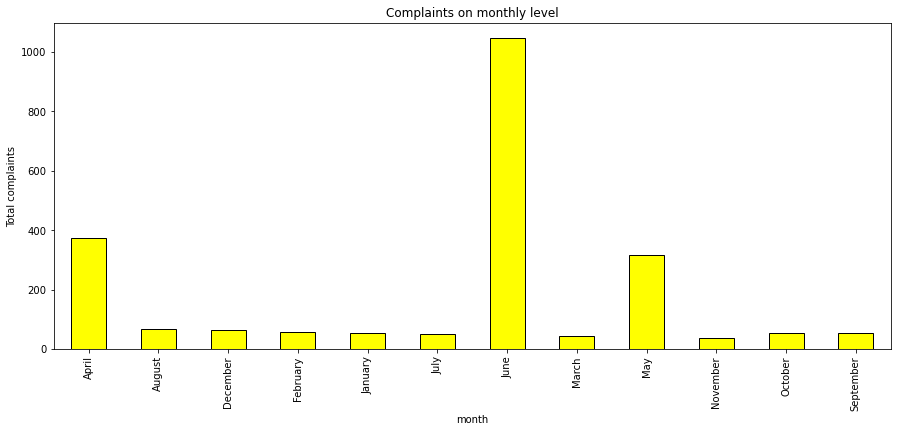

In [137]:
#number of complaints on monthly level
comcast.groupby('month')['Status'].count().plot(kind='bar',color='Yellow',edgecolor='black',figsize=(15,6),title='Complaints on monthly level',ylabel=('Total complaints'))


<AxesSubplot:title={'center':'Complaints on daily level'}, xlabel='Day of month', ylabel='Number of complaints'>

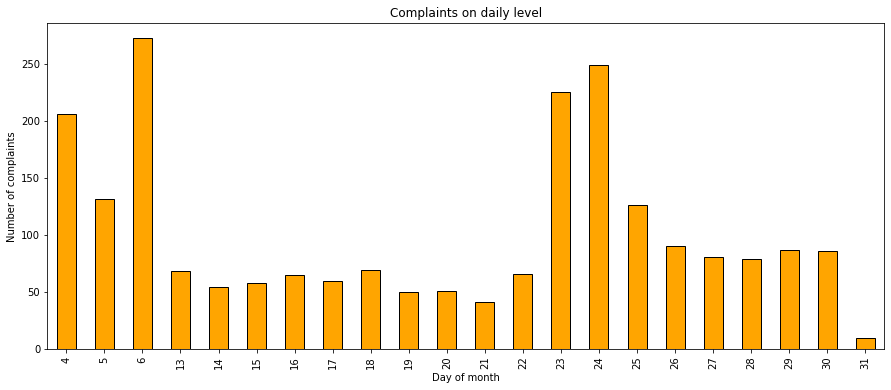

In [138]:
#Number of complaints on daily granularity level
comcast.groupby('day')['Status'].count().plot(kind='bar',color='orange',edgecolor='black',xlabel='Day of month',ylabel='Number of complaints',figsize=(15,6),title='Complaints on daily level')

In [139]:
#Complaint types frequency table
Complain_type_freq=comcast['Customer Complaint'].str.lower().value_counts().to_frame()
Complain_type_freq

,Customer Complaint
comcast,102
comcast data cap,30
comcast internet,29
comcast data caps,21
comcast billing,18
...,...
monthly data caps,1
"comcast/xfinity poor service, fraudulent billing and collection",1
lost emails/billing,1
improper billing and non resolution of issues,1


In [140]:
#maxium number of complaints from complaint types
Complain_type_freq.sort_values(by='Customer Complaint',ascending=False).head(3)
# maximum number of complaints from types of complaint is 'comcast'


,Customer Complaint
comcast,102
comcast data cap,30
comcast internet,29


In [141]:
#Creating a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
comcast['Status_type']=comcast['Status'].apply(lambda x: 'open' if (x=='Open'or x=='Pending') else 'closed')

In [142]:
comcast[['Status','Status_type']].value_counts()

Status   Status_type
Solved   closed         973
Closed   closed         734
Open     open           363
Pending  open           154
dtype: int64

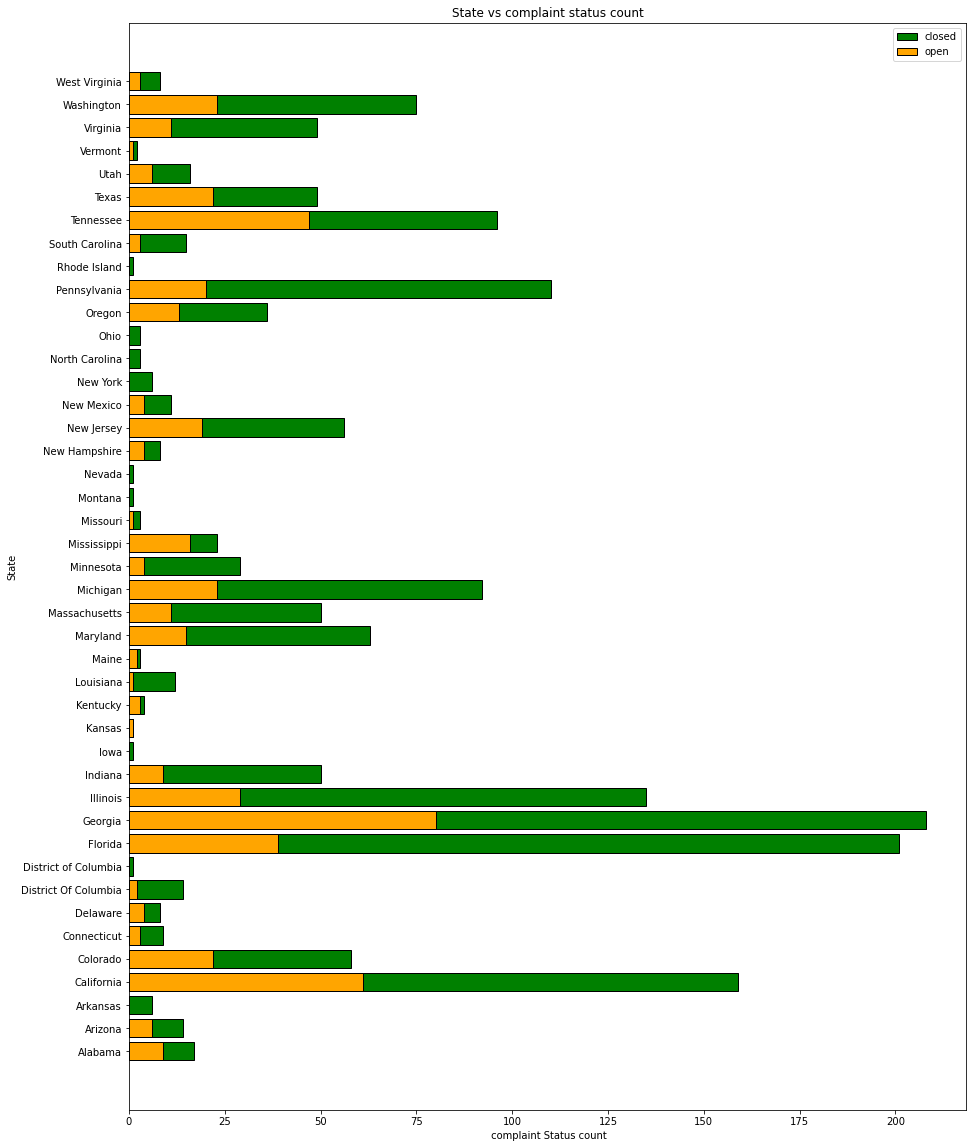

In [143]:
#- Providing state wise status of complaints in a stacked bar chart by using the categorized variable
state_wise_open_cases=comcast[comcast['Status_type']=="open"].groupby('State')['Customer Complaint'].count().to_frame().reset_index()
state_wise_closed_cases=comcast[comcast['Status_type']=="closed"].groupby('State')['Customer Complaint'].count().to_frame().reset_index()

plt.figure(figsize=(15,20))
#closed cases bar graph
plt.barh(state_wise_closed_cases['State'],state_wise_closed_cases['Customer Complaint'],color='green',edgecolor='black')
#open cases bar graph
plt.barh(state_wise_open_cases['State'],state_wise_open_cases['Customer Complaint'],color='orange',edgecolor='black')

plt.xlabel(' complaint Status count')
plt.ylabel('State')
plt.legend(['closed','open'])
plt.title('State vs complaint status count')
plt.show()


In [144]:
#State with the maximum complaints

#merging state_wise_open_cases and state_wise_closed_case into one dataframe
state_wise_total_cases=pd.merge(state_wise_open_cases,state_wise_closed_cases,on='State')
#Adding open complaints and closed complaints into a new column
state_wise_total_cases['total complaints']=state_wise_total_cases['Customer Complaint_x']+state_wise_total_cases['Customer Complaint_y']
#renaming columns
state_wise_total_cases.rename(columns={'Customer Complaint_x':'open cases','Customer Complaint_y':'closed cases'},inplace=True)

state_wise_total_cases.sort_values(by='total complaints',ascending=False)[['State','total complaints']].head(3)
#maximum complaints is from state 'Georgia'

,State,total complaints
8,Georgia,288
7,Florida,240
2,California,220


In [145]:
#state which has the highest percentage of unresolved complaints
state_wise_total_cases['unresolved cases %']=round((state_wise_total_cases['open cases']/state_wise_total_cases['total complaints'])*100,2)

In [146]:
state_wise_total_cases.sort_values(by='unresolved cases %',ascending=False).head(3)
#State 'Kansas' has the highest percentage of unresolved cases(50%)

,State,open cases,closed cases,total complaints,unresolved cases %
11,Kansas,1,1,2,50.00
12,Kentucky,3,4,7,42.86
19,Mississippi,16,23,39,41.03


In [147]:
# percentage of complaints resolved till date, which were received through the Internet and customer care calls.
round((comcast[comcast['Status_type']=='closed']['Received Via'].value_counts(normalize=True)*100),2)
#percentage of complaints resolved via customer care call is 50.62%
#percentage of complaints resolved via Internet is 49.38%


Customer Care Call    50.62
Internet              49.38
Name: Received Via, dtype: float64